<h3 align="right">STR, &nbsp; dSPN, &nbsp; 150917_c10_D1, &nbsp; WT-P270-20 <br> </h3>

# Model selection

## Model data

In [7]:
#!rm -rf x86_64
#!nrnivmodl mechanisms
%reset -f

## Simulation environment

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import json
import pickle
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

from utils import *

## Cell model definition

In [9]:
import cell_model, cell_evaluator
morphofile = 'morphology/WT-dMSN_P270-20_1.02_SGA1-m24.swc'
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=False
    )
protocols = cell_evaluator.define_protocols('protocols_dSPN.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
mechanisms = cell_model.define_mechanisms('mechanisms_dSPN.json')

## Def simulator (NEURON) etc

In [10]:
simulator = ephys.simulators.NrnSimulator()

### print celll

In [11]:
# best_models = json.load(open('dSPN_bestParams.json'))
# fig, ax     = plt.subplots(1,1)
    
# for v in range(3):
#     pwb = 'parameters_withBounds_%02d_dSPN.json' % (v)
#     print pwb
#     parameters      = cell_model.define_parameters(pwb)
#     test_parameters = {'gbar_kaf.somatic':0.15} #best_models[v]
    
#     simple_cell = ephys.models.CellModel(
#             name='dspn', 
#             morph=morphology, 
#             mechs=mechanisms, 
#             params=parameters)
    
    
#     simple_cell.instantiate(sim=simulator)

#     cell = simple_cell.icell
    
#     ephys2 = open("ephys2.txt",'w') 
    
#     for sec in cell.allsec():
        
#         cell_index, comp = sec.name().split('[')[1].split(']')
#         if comp.find('soma') > 0:
#             simulator.neuron.h.distance(0, 0.5, sec=sec)
        
#         if cell_index == '0':
#             ephys2.write( sec.name() )
#             ephys2.write( '\tL : %f\n' % sec.L )
#             ephys2.write( '\tnseg : %d\n' % sec.nseg )
#             for seg in sec:
#                 distance = simulator.neuron.h.distance(1, seg.x, sec=sec)
#                 ephys2.write( '\tx : %f;\tarea : %f\n' % (seg.x, seg.area()) )
#                 ephys2.write( '\t\t\tdiam : %f\n' % seg.diam )
#                 ephys2.write( '\t\t\tdist : %f\n' % distance )
#                 # channels; everwhere
#                 ephys2.write( '\t\t\tnaf : %f\n' % seg.naf.gbar )
#                 ephys2.write( '\t\t\tkas : %f\n' % seg.kas.gbar )
#                 # soma
#                 if sec.name().find('soma') > 0:
#                     ephys2.write( '\t\t\tkir : %f\n' % seg.kir.gbar )
#                     ephys2.write( '\t\t\tkaf : %f\n' % seg.kaf.gbar )
#                     ephys2.write( '\t\t\tkdr : %f\n' % seg.kdr.gbar )
#                     ephys2.write( '\t\t\tcan : %e\n' % seg.can.pbar )
#                     ephys2.write( '\t\t\tcar : %e\n' % seg.car.pbar )
#                     ephys2.write( '\t\t\tcal12 : %e\n' % seg.cal12.pbar )
#                     ephys2.write( '\t\t\tcal13 : %e\n' % seg.cal13.pbar )
#                     ephys2.write( '\t\t\tsk : %f\n' % seg.sk.gbar )
#                     ephys2.write( '\t\t\tbk : %f\n' % seg.bk.gbar )
#                 # dend
#                 if sec.name().find('dend') > 0:
#                     ephys2.write( '\t\t\tkir : %f\n' % seg.kir.gbar )
#                     ephys2.write( '\t\t\tkaf : %f\n' % seg.kaf.gbar )
#                     ephys2.write( '\t\t\tkdr : %f\n' % seg.kdr.gbar )
#                     ephys2.write( '\t\t\tcan : %e\n' % seg.can.pbar )
#                     ephys2.write( '\t\t\tcar : %e\n' % seg.car.pbar )
#                     ephys2.write( '\t\t\tcal12 : %e\n' % seg.cal12.pbar )
#                     ephys2.write( '\t\t\tcal13 : %e\n' % seg.cal13.pbar )
#                     ephys2.write( '\t\t\tsk : %f\n' % seg.sk.gbar )
#                     ephys2.write( '\t\t\tbk : %f\n' % seg.bk.gbar )
#                     ephys2.write( '\t\t\tcav32 : %e\n' % seg.cav32.pbar )
#                     ephys2.write( '\t\t\tcav33 : %e\n' % seg.cav33.pbar )
    
#     ephys2.close()
    
#     gggh
#     opt_params = [p.name for p in cell.params.values() if not p.frozen]
#     evaluator  = ephys.evaluators.CellEvaluator(
#             cell_model=cell,
#             param_names=opt_params,
#             fitness_protocols=protocols,
#             fitness_calculator=calculator,
#             sim=simulator)
    
#     test_responses = evaluator.run_protocols(
#         protocols=protocols.values(), 
#         param_values={})
#     for index, (name, response) in enumerate(sorted(test_responses.items())):
#         try:
#             ax.plot(response['time'], response['voltage'], label=str(v))
#         except:
#             print 'something whent wrong with sim \t', v
#     print v
# plt.legend(loc=2)
# plt.show()

## Single-cell simulation

<IPython.core.display.Javascript object>


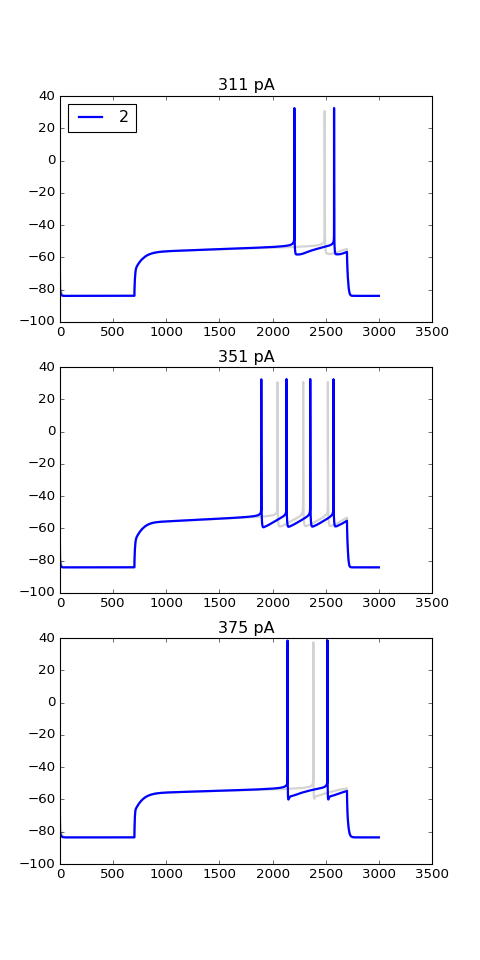

0
1
2


In [14]:


best_models = json.load(open('dSPN_bestParams.json'))
fig, ax     = plt.subplots(3,1,figsize=(6,12))

a     ={ 0: {0:0.3, 1:0.3, 2:1},
         1: {0:0.3, 1:1, 2:0.3},
         2: {0:1, 1:0.3, 2:0.3}
       }

for v in range(3):
    
    pwb = 'parameters_withBounds_%02d_dSPN.json' % (v)
    exp_data_name = 'rheobase_model%02d.txt' % (v)
    
    parameters      = cell_model.define_parameters(pwb)
    test_parameters = {} #best_models[v]
    
    cell = ephys.models.CellModel(
            name='dspn', 
            morph=morphology, 
            mechs=mechanisms, 
            params=parameters)
    opt_params = [p.name for p in cell.params.values() if not p.frozen]
    evaluator  = ephys.evaluators.CellEvaluator(
            cell_model=cell,
            param_names=opt_params,
            fitness_protocols=protocols,
            fitness_calculator=calculator,
            sim=simulator)
    
    test_responses = evaluator.run_protocols(
        protocols=protocols.values(), 
        param_values={})
    ax[2-v].plot(*np.loadtxt(exp_data_name, unpack=True), color='lightgrey', lw=2)
    for index, (name, response) in enumerate(sorted(test_responses.items())):
        if a[v][index] == 1:
            ax[index].plot(response['time'], response['voltage'], 
                       label=str(v), 
                       alpha=a[v][index],
                       lw=a[v][index]*2)
    
    print v
ax[0].legend(loc=2)
ax[0].set_title('311 pA')
ax[1].set_title('351 pA')
ax[2].set_title('375 pA')
fig.savefig('figure_comparing_models.png')
plt.show()

# Save models variables to file
## 1 param and one bestParam

In [67]:
best_models = json.load(open('best_parameters_dSPN_00_.json'))
base_values = json.load(open('params_dMSN.json'))
parameters = json.load(open('config/parameters_dSPN.json'))
with open('D1_71bestFit.pkl', 'rb') as f:
    data = pickle.load(f)

hall_of_fame = []

for model_version in data:
    
    BM = {}
    
    dend_distribution_variables = data[model_version]['variables']
    
    for key in best_models:
        
        var_chan, comp = key.     split('.')
        var, chan      = var_chan.split('_')
        
        if chan in ['cav32', 'cav33', 'can']:
            ddv = dend_distribution_variables[chan.replace('av','')]
            print chan, comp, ddv
            BM[key.replace('dend','basal')] = np.power(10,ddv[0])
        else:
            ddv = dend_distribution_variables[chan]
            bv  = base_values[key.replace('.','_')]['Value']
            print chan, comp, 'ddv', ddv, 'bv', bv
            BM[key.replace('dend','basal')] = np.power(10,ddv[0]) * float(bv)
    
    hall_of_fame.append(BM)
    
    # this is where the parameters and variables are defined.
    PAR = []
    
    for p in parameters:
        
        E = {}
        
        # check entry type and sort
        if 'mech' in p:
            # all channels
            
            # get params
            chan  = p['mech']
            sec   = p['sectionlist']
            pname = p['param_name']
            
            if 'dist' in p:
                if sec == 'axonal': 
                    vbas=1.0; v1=0.1; v2=30.0; v3=-1.0
                    E['value']=float(base_values[pname+'_'+sec.replace('basal','dend')]['Value'])
                else:
                    if chan == 'naf':
                        v0, v1, v2, v3 = data[model_version]['variables'][chan]
                        vbas = 1.0 - v1
                    elif chan == 'kaf':
                        v0, v1, v2, v3 = data[model_version]['variables'][chan]
                        vbas = 1.0
                    elif chan == 'kas':
                        v0, v2, v3  = data[model_version]['variables'][chan]
                        vbas=1.0; v1=0.9
                    elif chan == 'can':
                        v0, v1, v2, v3 = data[model_version]['variables'][chan]
                        vbas = 1.0 - v1
                    elif chan in ['cav32','cav33']:
                        v0, v2, v3  = data[model_version]['variables'][chan.replace('av','')]
                        vbas=0.0; v1=1.0
                    
                    E['bounds'] = p['bounds']
                
                dist = "(%f + %f/(1+math.exp((({distance}+6.1)-%f)/%f) ))*{value}" % (vbas,v1,v2,v3)
                E['dist'] = dist
                
            elif 'bounds' in p:
                E['bounds'] = p['bounds']
                
            elif chan == 'bk':
                E['value'] = float(base_values[pname+'_'+sec.replace('basal','dend')]['Value'])
            
            else: # L-typ
                E['value'] = p['value']
            
            E['mech']        = chan
            E['sectionlist'] = sec
            E['param_name']  = pname
            E['mech_param']  = p["mech_param"]
            E['dist_type']   = p['dist_type']
            E['type']        = p['type']
            
        else:
            # passive parameters
            for entry in p:
                E[entry] = p[entry]
        
        PAR.append(E)
    
    with open('Params/parameters_withBounds_%02d_dSPN.json' % (model_version), 'w') as fp:
        json.dump(PAR, fp, indent=4, sort_keys=True)
            
    
    
with open('dSPN_bestParams.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)

naf dend ddv [0.39520626094088906, 0.9986325335385484, 48.289236039096984, 6.000750429482659] bv  0.9 
sk dend ddv [-0.2790661370879761] bv  0.00002 
cav33 dend [-8.212662104704151, 12.375838483416263, -61.20128657462033]
kir dend ddv [-0.4414058585509568] bv  0.0012 
kas dend ddv [-0.37430413619809044, 46.200231582606804, 63.773890402220076] bv  0.012 
cav32 dend [-6.492456982023044, 99.91454009301859, -15.572922368371282]
can dend [-5.310444166275086, 0.9276070561378059, 29.23826338712706, 10.631398853096753]
kaf dend ddv [0.007550641548724646, 0.8102975570596093, 40.23902852982299, -49.0780819896046] bv  0.12 
sk somatic ddv [-0.2790661370879761] bv  0.00002 
kir somatic ddv [-0.4414058585509568] bv  0.0012 
naf dend ddv [-0.32769103336000593, 0.993597426760602, 28.14064261173643, 3.5417136952409995] bv  0.9 
sk dend ddv [-0.35989369079761446] bv  0.00002 
cav33 dend [-8.243814718472565, 99.66404668260252, -57.11151610639367]
kir dend ddv [-0.10220674270959906] bv  0.0012 
kas dend 

sk somatic ddv [-0.46169607320691375] bv  0.00002 
kir somatic ddv [-0.23975660796035547] bv  0.0012 
naf dend ddv [0.21543147369155913, 0.9850457539658635, 36.70314678146083, 5.218923988788606] bv  0.9 
sk dend ddv [-0.36347019302881445] bv  0.00002 
cav33 dend [-8.611906661826621, 11.802279909494201, -21.05743758493159]
kir dend ddv [-0.1268801101217374] bv  0.0012 
kas dend ddv [-0.02775290634367411, 28.403355329878693, 27.12556990653784] bv  0.012 
cav32 dend [-6.750068317513926, 52.90188938569757, -21.378108097275835]
can dend [-6.278458022711412, 0.9692990758183091, 13.782253194970464, 22.92306139074595]
kaf dend ddv [-0.0316304110640786, 0.8758181930649573, 129.34836535796939, -24.32215983256964] bv  0.12 
sk somatic ddv [-0.36347019302881445] bv  0.00002 
kir somatic ddv [-0.1268801101217374] bv  0.0012 
naf dend ddv [-0.06508857464458284, 0.9978534555036009, 44.40084342370586, 5.2820516976470415] bv  0.9 
sk dend ddv [-0.2959409523465988] bv  0.00002 
cav33 dend [-8.8765309710

## save one file only: no bounds and bestParams

In [130]:
best_models = json.load(open('best_parameters_dSPN_00_.json'))
base_values = json.load(open('params_dMSN.json'))
parameters = json.load(open('config/parameters_dSPN.json'))
with open('D1_71bestFit.pkl', 'rb') as f:
    data = pickle.load(f)


for model_version in data:
    
    dend_distribution_variables = data[model_version]['variables']
    
    PAR = []
    
    for p in parameters:
        
        E = {}
        
        # check entry type and sort
        if 'mech' in p:
            # all channels
            
            # get mechanism, section_type, parameter name
            chan  = p['mech']
            sec   = p['sectionlist']
            pname = p['param_name']
            
            if 'dist' in p:
                if chan == 'naf':
                    if sec == 'dend': 
                        v0, v1, v2, v3 = data[model_version]['variables'][chan]
                        vbas = 1.0 - v1
                        value=float(base_values[pname+'_'+sec.replace('basal','dend')]['Value']) * np.power(10,v0)
                    elif sec == 'axonal': 
                        vbas=1.0; v1=0.1; v2=30.0; v3=-1.0
                        value=float(base_values[pname+'_'+sec.replace('basal','dend')]['Value'])
                elif chan == 'kaf':
                    v0, v1, v2, v3 = data[model_version]['variables'][chan]
                    vbas = 1.0
                    value=float(base_values[pname+'_'+sec.replace('basal','dend')]['Value']) * np.power(10,v0)
                elif chan == 'kas':
                    v0, v2, v3  = data[model_version]['variables'][chan]
                    vbas=1.0; v1=0.9
                    value=float(base_values[pname+'_'+sec.replace('basal','dend')]['Value']) * np.power(10,v0)
                elif chan == 'can':
                    v0, v1, v2, v3 = data[model_version]['variables'][chan]
                    vbas = 1.0 - v1
                    value = np.power(10,v0)
                elif chan in ['cav32','cav33']:
                    v0, v2, v3  = data[model_version]['variables'][chan.replace('av','')]
                    vbas=0.0; v1=1.0
                    value = np.power(10,v0)
                
                dist = "(%f + %f/(1+math.exp(({distance}-%f)/%f) ))*{value}" % (vbas,v1,v2,v3)
                E['dist'] = dist
                
            elif 'bounds' in p:
                value = np.power(10,dend_distribution_variables[chan][0]) * float(base_values[pname+'_'+sec.replace('basal','dend')]['Value'])
                
            elif chan == 'bk':
                value = float(base_values[pname+'_'+sec.replace('basal','dend')]['Value'])
            
            else: # L-typ
                value = p['value']
            
            E['mech']        = chan
            E['sectionlist'] = sec
            E['param_name']  = pname
            E['mech_param']  = p["mech_param"]
            E['dist_type']   = p['dist_type']
            E['type']        = p['type']
            E['value']       = value
            
        else:
            # passive parameters
            for entry in p:
                E[entry] = p[entry]
        
        PAR.append(E)
    
    with open('Params/parameters_%02d_dSPN.json' % (model_version), 'w') as fp:
        json.dump(PAR, fp, indent=4, sort_keys=True)
 

In [ ]:
    # loop over cell and print parameters
    '''
    cell.freeze( best_models[v] )
    cell.instantiate(sim=simulator)
    cell1 = cell.icell
    for sec in cell1.allsec():
        cell_index, comp = sec.name().split('[')[1].split(']')
        if comp.find('soma') > 0:
            simulator.neuron.h.distance(0, 0.5, sec=sec)
        if cell_index == '0':
            print sec.name()
            print '\tL : %f' % sec.L
            print '\tnseg : %d' % sec.nseg
            for seg in sec:
                distance = simulator.neuron.h.distance(1, seg.x, sec=sec)
                print '\t\tx : %f;\tarea : %f' % (seg.x, seg.area())
                print '\t\t\t\tdiam : %f' % seg.diam
                print '\t\t\t\tdist : %f' % distance
                print '\t\t\t\tnaf : %f' % seg.naf.gbar
                #print '\t\t\t\tkaf : %f' % seg.kaf.gbar
                print '\t\t\t\tkas : %f' % seg.kas.gbar
                #print '\t\t\t\tkir : %f' % seg.kir.gbar
    '''